In [ ]:
#!pip install duckdb-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 45.5 MB/s eta 0:00:00 0:00:01


In [18]:
import duckdb


## This is a demo from the JupySQL documentation
https://jupysql.ploomber.io/en/latest/plot.html#

In [3]:
from pathlib import Path
from urllib.request import urlretrieve

url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet"

if not Path("yellow_tripdata_2021-01.parquet").is_file():
    urlretrieve(url, "yellow_tripdata_2021-01.parquet")

In [4]:
%load_ext sql

In [5]:
%sql duckdb://


Connecting to 'duckdb://'

In [6]:
%%sql
SELECT * FROM "yellow_tripdata_2021-01.parquet" LIMIT 3

Running query in 'duckdb://'

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.1,1.0,N,142,43,2,8.0,3.0,0.5,0.0,0.0,0.3,11.8,2.5,None
1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.2,1.0,N,238,151,2,3.0,0.5,0.5,0.0,0.0,0.3,4.3,0.0,None
1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.7,1.0,N,132,165,1,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,None


In [7]:
%%sql
SELECT COUNT(*) FROM "yellow_tripdata_2021-01.parquet"

Running query in 'duckdb://'

count_star()
1369769


<Axes: title={'center': "'trip_distance' from 'yellow_tripdata_2021-01.parquet'"}, ylabel='trip_distance'>

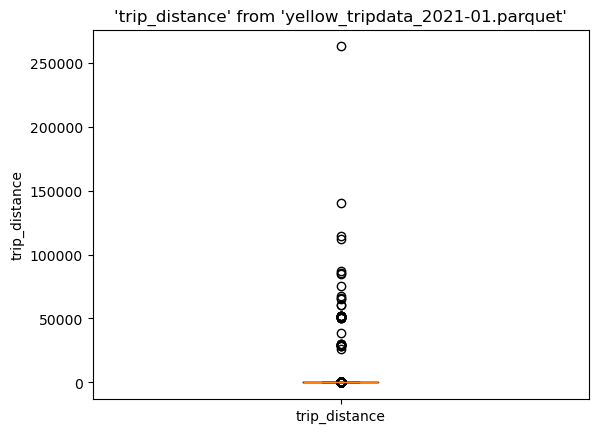

In [8]:
%sqlplot boxplot --table yellow_tripdata_2021-01.parquet --column trip_distance


In [9]:
%%sql
SELECT percentile_disc(0.90) WITHIN GROUP (ORDER BY trip_distance),
FROM 'yellow_tripdata_2021-01.parquet'

Running query in 'duckdb://'

quantile_disc(0.90 ORDER BY trip_distance)
6.3


In [10]:
%%sql --save short_trips --no-execute
SELECT *
FROM "yellow_tripdata_2021-01.parquet"
WHERE trip_distance < 6.3

Running query in 'duckdb://'

Skipping execution...

<Axes: title={'center': "'trip_distance' from 'short_trips'"}, ylabel='trip_distance'>

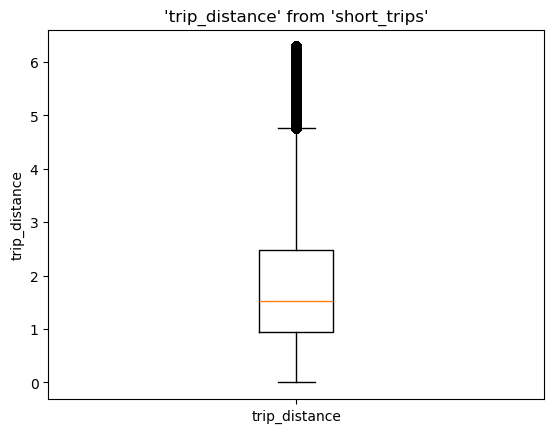

In [11]:
%sqlplot boxplot --table short_trips --column trip_distance


<Axes: title={'center': "'trip_distance' from 'short_trips'"}, xlabel='trip_distance', ylabel='Count'>

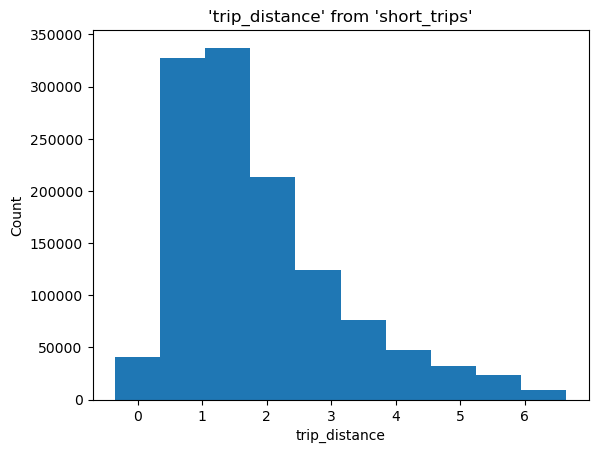

In [12]:
%sqlplot histogram --table short_trips --column trip_distance --bins 10


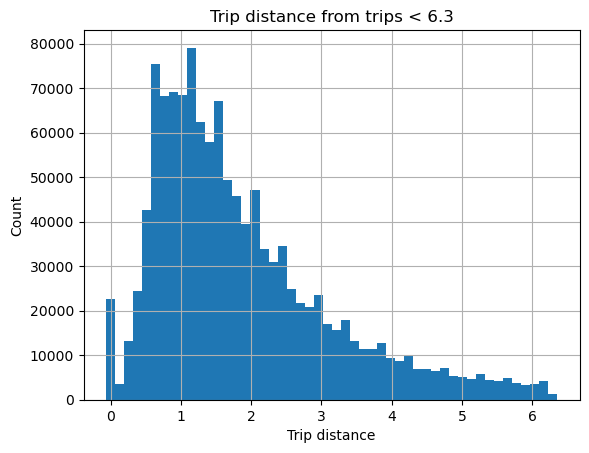

In [13]:
ax = %sqlplot histogram --table short_trips --column trip_distance --bins 50
ax.grid()
ax.set_title("Trip distance from trips < 6.3")
_ = ax.set_xlabel("Trip distance")

Removing NULLs, if there exists any from payment_type

<Axes: title={'center': 'short_trips'}, xlabel='payment_type', ylabel='Count'>

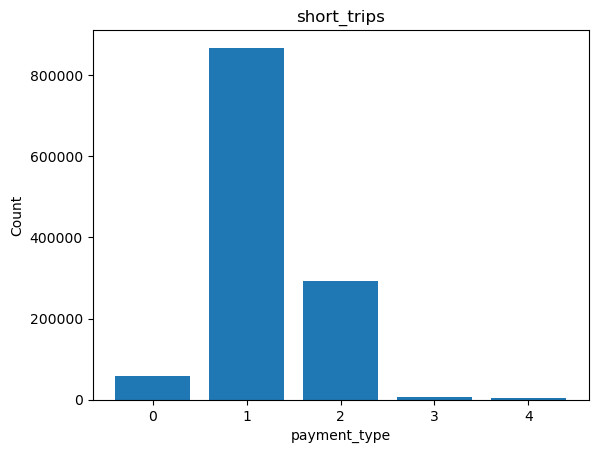

In [14]:
%sqlplot bar --table short_trips --column payment_type

## Let's do the same thing in Pandas 

In [15]:
url = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2021-01.parquet"

if not Path("yellow_tripdata_2021-01.parquet").is_file():
    urlretrieve(url, "yellow_tripdata_2021-01.parquet")

In [25]:


yellow_df=duckdb.query(f"SELECT * FROM 'yellow_tripdata_2021-01.parquet'").to_df()

# Display the first few rows
yellow_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2,8.00,3.00,0.5,0.00,0.00,0.3,11.80,2.5,NaN
1,1,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2,3.00,0.50,0.5,0.00,0.00,0.3,4.30,0.0,NaN
2,1,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1,42.00,0.50,0.5,8.65,0.00,0.3,51.95,0.0,NaN
3,1,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1,29.00,0.50,0.5,6.05,0.00,0.3,36.35,0.0,NaN
4,2,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1,16.50,0.50,0.5,4.06,0.00,0.3,24.36,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369764,2,2021-01-31 23:03:00,2021-01-31 23:33:00,NaN,8.89,NaN,None,229,181,0,27.78,0.00,0.5,7.46,0.00,0.3,38.54,NaN,NaN
1369765,2,2021-01-31 23:29:00,2021-01-31 23:51:00,NaN,7.43,NaN,None,41,70,0,32.58,0.00,0.5,0.00,6.12,0.3,39.50,NaN,NaN
1369766,2,2021-01-31 23:25:00,2021-01-31 23:38:00,NaN,6.26,NaN,None,74,137,0,16.85,0.00,0.5,3.90,0.00,0.3,24.05,NaN,NaN
1369767,6,2021-01-31 23:01:06,2021-02-01 00:02:03,NaN,19.70,NaN,None,265,188,0,53.68,0.00,0.5,0.00,0.00,0.3,54.48,NaN,NaN


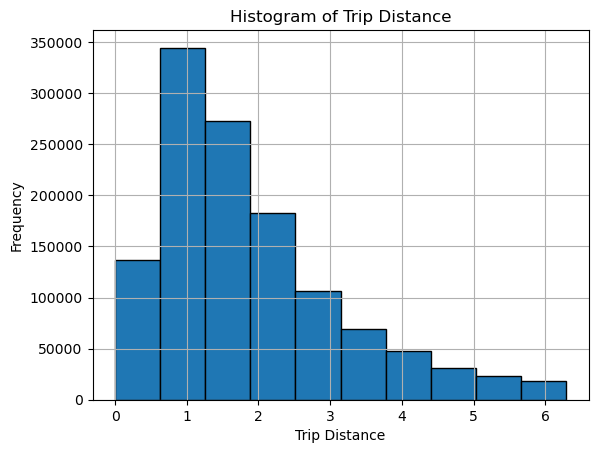

In [27]:
# Filter the DataFrame
filtered_df = yellow_df[yellow_df["trip_distance"] < 6.3]


# Plot histogram
filtered_df["trip_distance"].hist(bins=10, edgecolor='black')

# Customize labels and title
plt.xlabel("Trip Distance")
plt.ylabel("Frequency")
plt.title("Histogram of Trip Distance")

# Show the plot
plt.show()